In [116]:
import re
import os

import matplotlib.pyplot as plt
import pandas as pd

# Проверка зависимости от размера вычислительной задачи: ранг

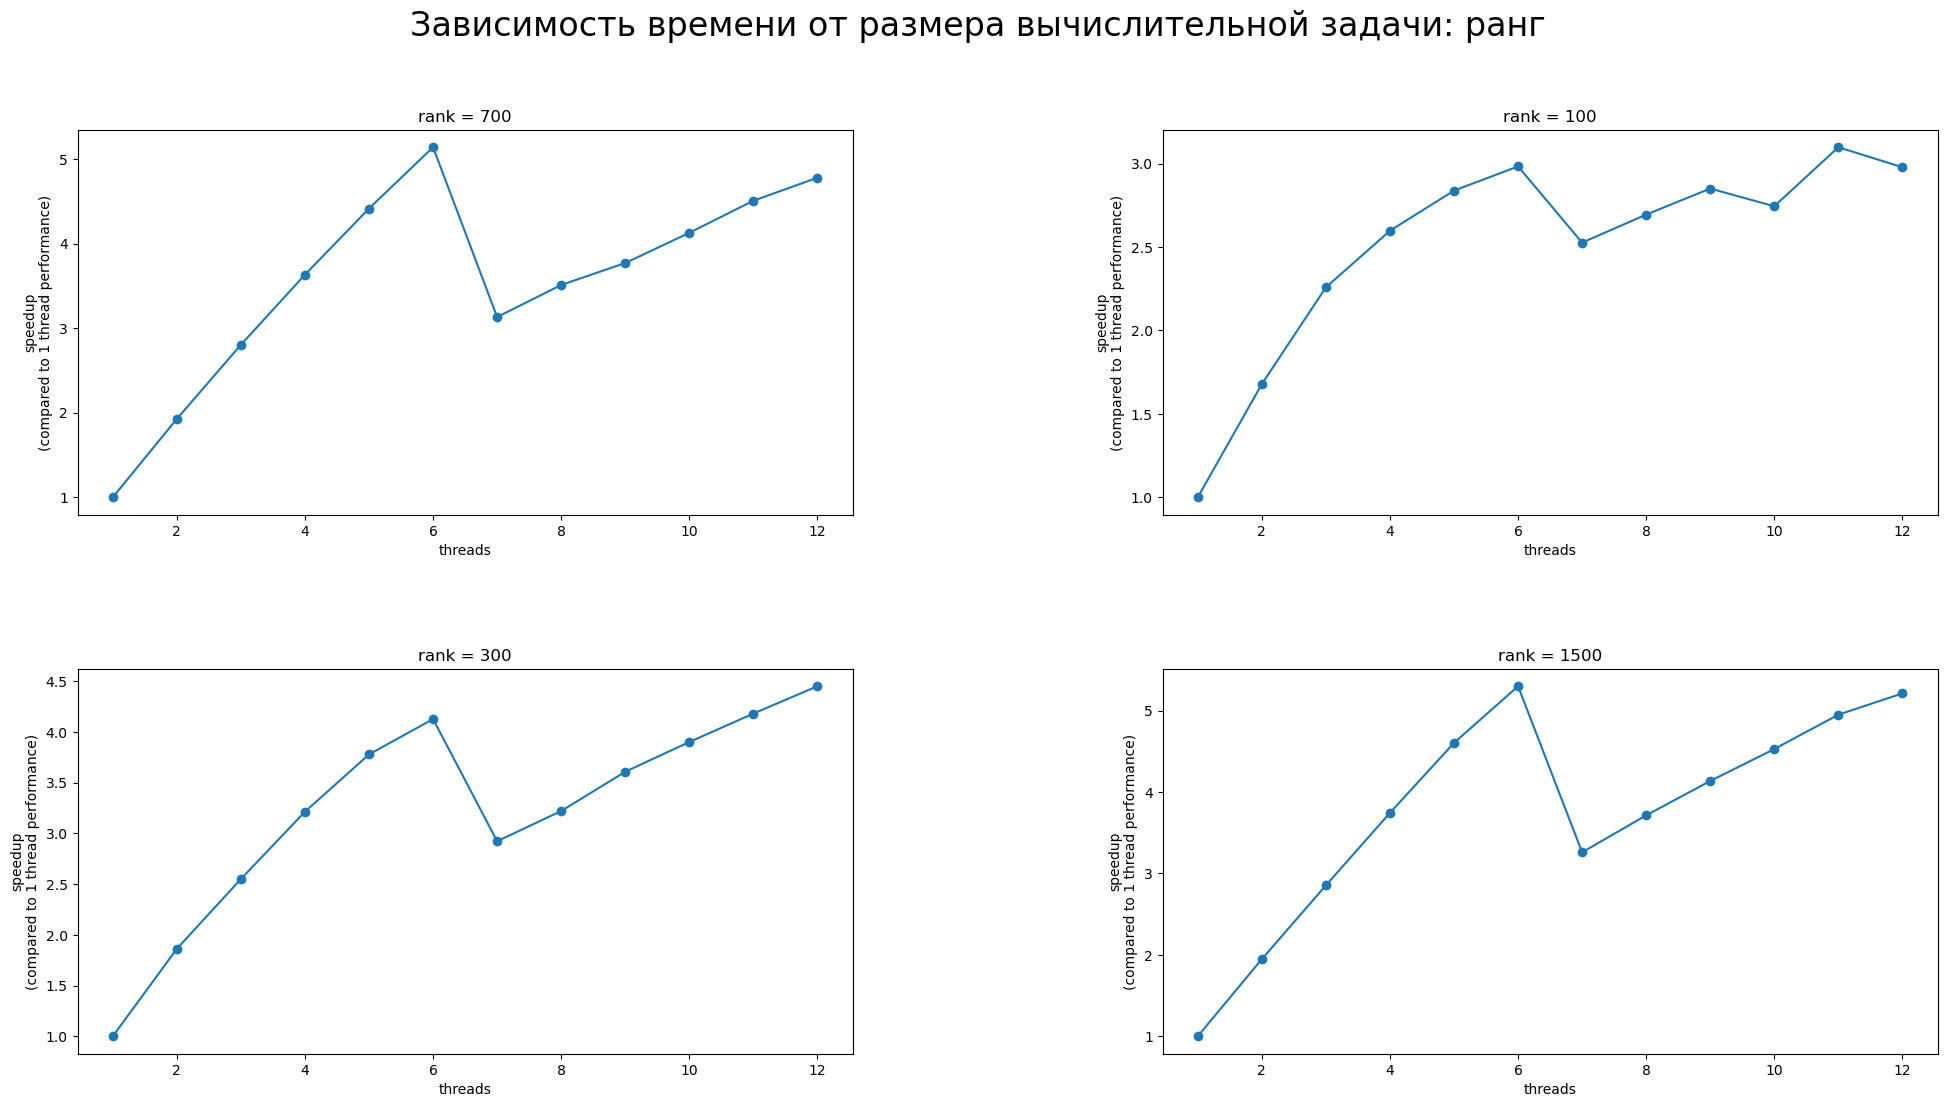

In [117]:
plt.figure(figsize=(24, 12))

plt.suptitle("Зависимость времени от размера вычислительной задачи: ранг", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

curr_index = 0
for iters_experiment_file in os.listdir("./ranks"):
    if iters_experiment_file.endswith('.csv'):
        continue
    threads = []
    iters_speedups = []
    iters_times = []

    rank = int(re.findall(r'rank=(\d+)', iters_experiment_file)[0])

    with open("./ranks/" + iters_experiment_file, "r") as iters_experiment_file:
        time_one_thread = None
        while line := iters_experiment_file.readline():
            threads_num = int(re.findall(r'threads=(\d+)', line)[0])
            time = float(re.findall(r'time=(\d+\.\d+)', line)[0])
            if time_one_thread == None:
                time_one_thread = time
            threads.append(threads_num)
            iters_times.append(time)
            iters_speedups.append(time_one_thread / time)

            pd.DataFrame(zip(threads, iters_times), columns=["Потоки", "Время выполнения"]).to_csv("./ranks/" + f"table_iters={rank}.csv", index=False)


    plt.subplot(2,2,curr_index+1)
    curr_index += 1
    plt.plot(threads, iters_speedups, "-o")
    plt.xlabel("threads")
    plt.ylabel("speedup\n(compared to 1 thread performance)")
    plt.title(f"rank = {rank}")



# Проверка зависимости от размера вычислительной задачи: количество итераций

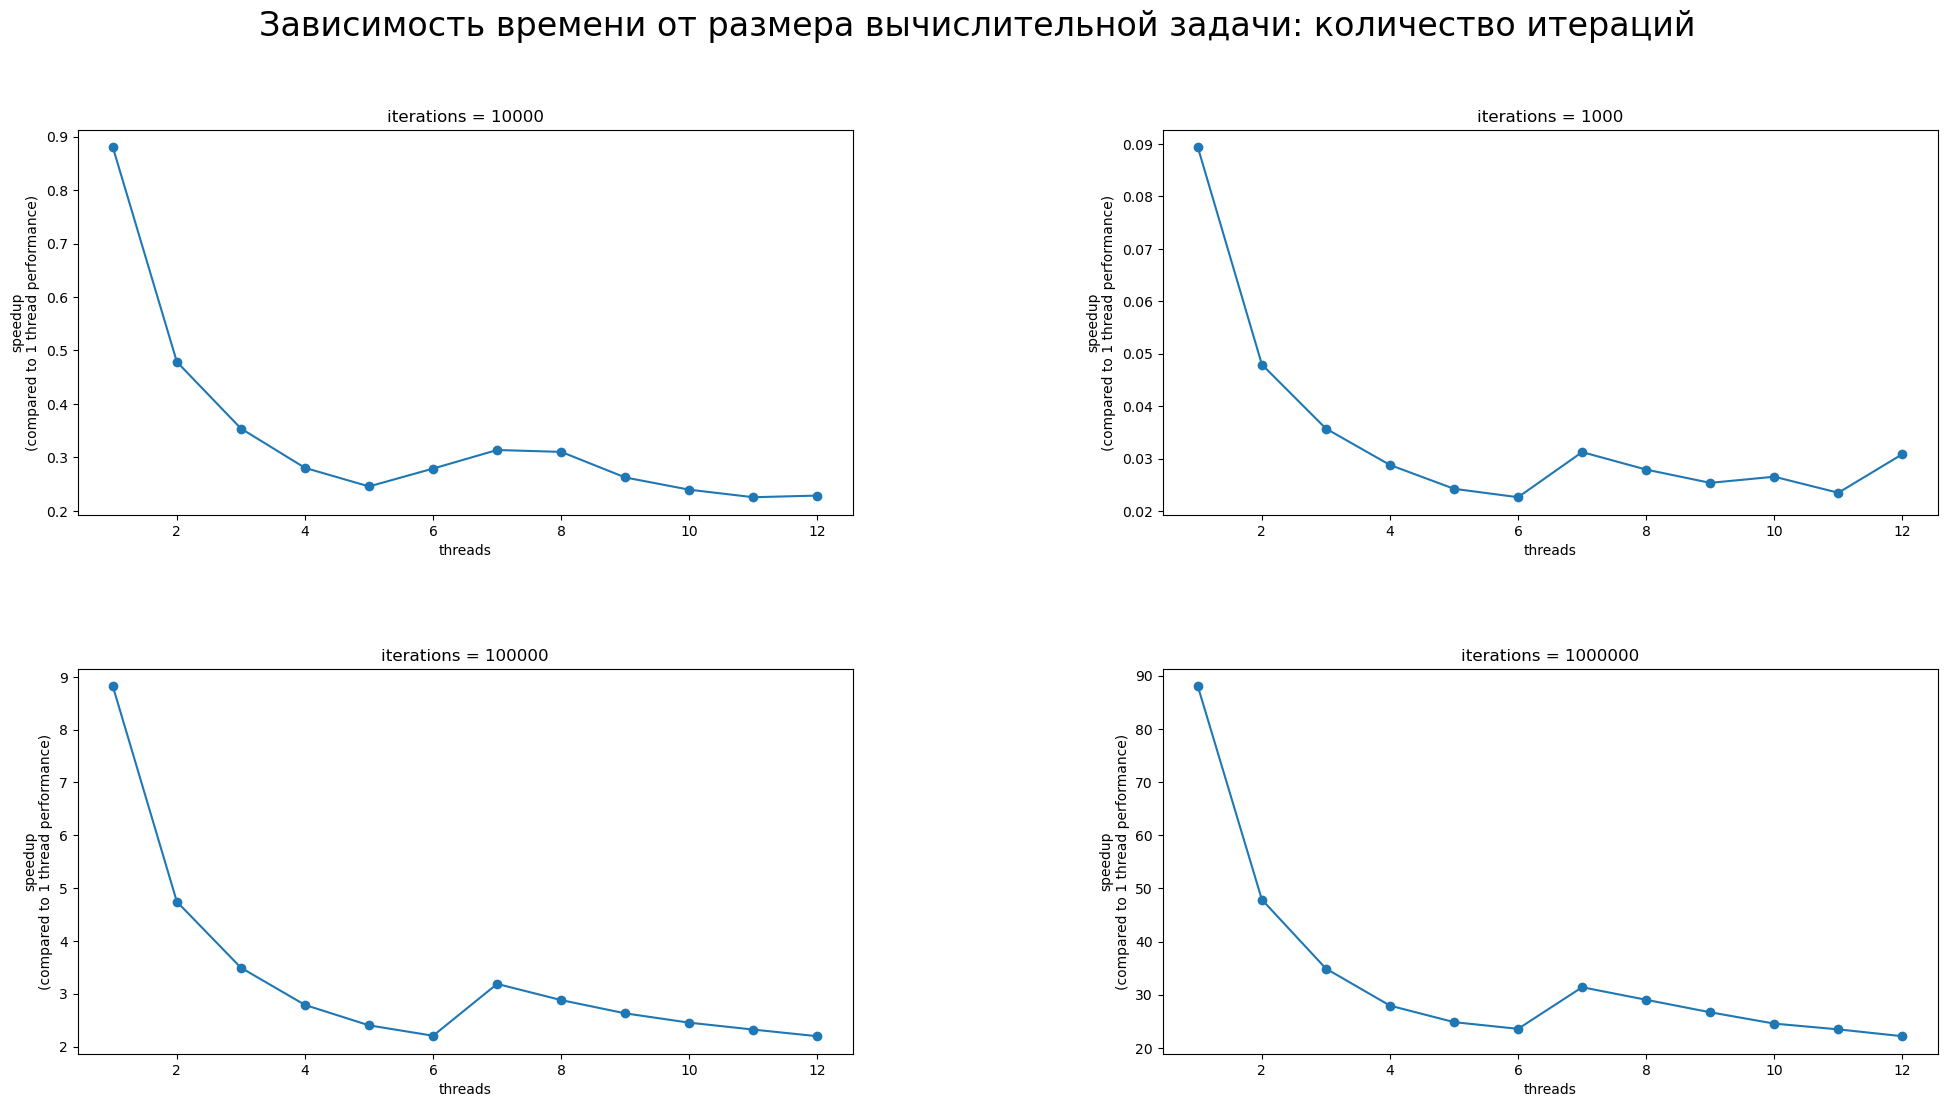

In [118]:
plt.figure(figsize=(24, 12))

plt.suptitle("Зависимость времени от размера вычислительной задачи: количество итераций", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)

iters_dict = {}

curr_index = 0
for iters_experiment_file in os.listdir("./iter"):
    if iters_experiment_file.endswith('.csv'):
        continue
    threads = []
    iters_times = []
    iters_speedups = []

    iters = int(re.findall(r'iters=(\d+)', iters_experiment_file)[0])

    iters_dict[iters] = []

    with open("./iter/" + iters_experiment_file, "r") as iters_experiment_file:
        time_one_thread = None
        while line := iters_experiment_file.readline():
            threads_num = int(re.findall(r'threads=(\d+)', line)[0])
            time = float(re.findall(r'time=(\d+\.\d+)', line)[0])
            if time_one_thread == None:
                time_one_thread = time
            threads.append(threads_num)
            iters_times.append(time) 
            iters_speedups.append(time_one_thread / time)

        pd.DataFrame(zip(threads, iters_times), columns=["Потоки", "Время выполнения"]).to_csv("./iter/" + f"table_iters={iters}.csv")

    plt.subplot(2,2,curr_index+1)
    curr_index += 1
    plt.plot(threads, iters_times, "-o")
    plt.xlabel("threads")
    plt.ylabel("speedup\n(compared to 1 thread performance)")
    plt.title(f"iterations = {iters}")

In [119]:
iters_dict[1000]
pd.DataFrame(iters_dict, columns=[1000, 10000, 100000, 1000000]).to_csv("test.csv", index=False)

### Проверка закона Амдала

Text(0, 0.5, 'speedup\n(compared to 1 thread performance)')

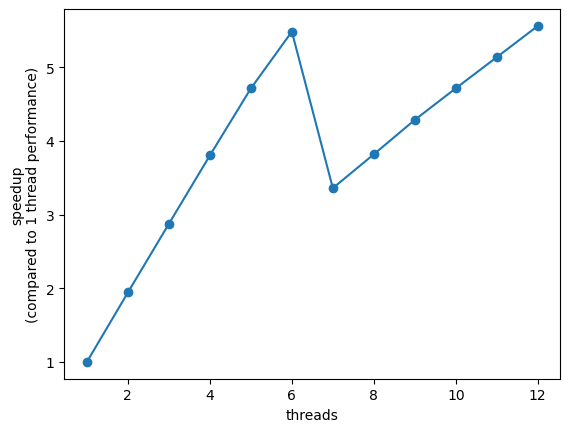

In [120]:
# amdahls law

threads = []
threads_speedups = []
threads_times = []

with open("amdahls_law_check.txt", "r") as te_file:
    time_one_thread = None
    while line := te_file.readline():
        thread_num = int(re.findall(r'threads=(\d+)', line)[0])
        time = float(re.findall(r'time=(\d+\.\d+)', line)[0])
        if time_one_thread == None:
            time_one_thread = time
        threads.append(thread_num)
        threads_times.append(time)
        threads_speedups.append(time_one_thread / time)
    
amdahls_table = pd.DataFrame(zip(threads, threads_times), columns=["Потоки", "Время выполнения"]).to_csv("amdahls_table.csv", index=False)

def amdahl(p, s):
    return 1 / ((1 - p) + p / s)


plt.plot(threads, threads_speedups, "-o")
plt.xlabel("threads")
plt.ylabel("speedup\n(compared to 1 thread performance)")